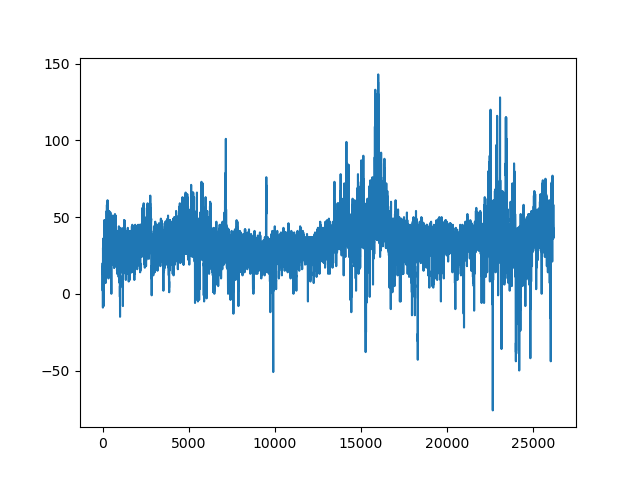

In [12]:
%matplotlib widget

import pandas as pd
import torch
from matplotlib import pyplot as plt
from torch.nn import functional as F

prices = pd.read_excel('data\consecutive_prices.xlsx')
prices = prices.loc[:, 'AT_price_day_ahead'].to_numpy()

plt.plot(prices)
plt.show()

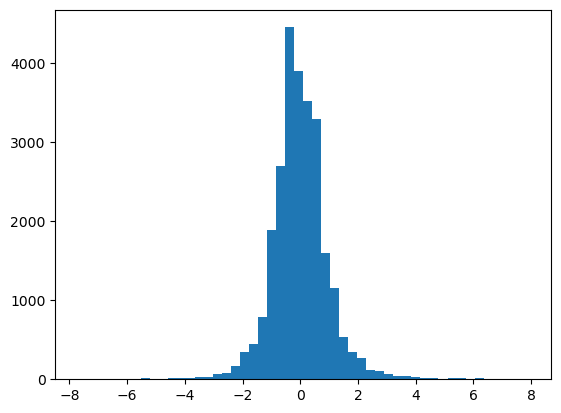

In [14]:
%matplotlib inline

prices_tensor = torch.tensor(prices, dtype=torch.float)
normalized_prices = (prices_tensor - prices_tensor.mean()) / torch.sqrt(prices_tensor.var().unsqueeze(0))

plt.hist(normalized_prices.numpy(), 50)
plt.show()


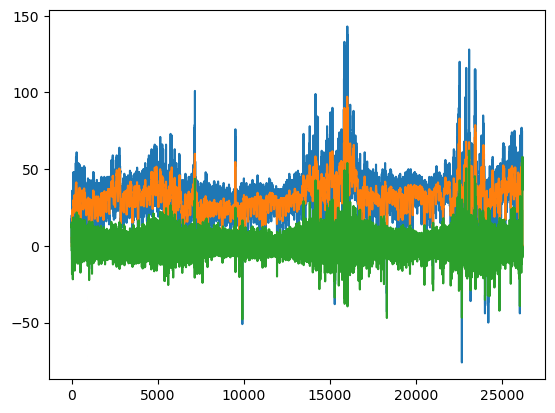

In [15]:
prices        = torch.tensor(prices, dtype=torch.float)
price_average = torch.zeros_like(prices)

smoother = 0.9
pred_horizon = 12

for i in range(1, len(prices) - pred_horizon):
    price_average[i] = smoother * price_average[i - 1] + (1 - smoother) * prices[i:i + pred_horizon].mean()

plt.cla()
plt.plot(prices)
plt.plot(price_average)
plt.plot(prices - price_average)
plt.show()